In [1]:
def evaluate_classifier(df_positive, df_negative, pos_label=1, neg_label=0, title_suffix="", save_path=None):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
    import os

    roc_data = []

    # Labels setzen
    df_positive = df_positive.copy()
    df_negative = df_negative.copy()
    df_positive['Label'] = pos_label
    df_negative['Label'] = neg_label

    # Kombinieren
    data = pd.concat([df_positive, df_negative], ignore_index=True)

    y_numeric = pd.concat([
        pd.Series([pos_label] * len(df_positive)),
        pd.Series([neg_label] * len(df_negative))
    ], ignore_index=True)

    # Labels umbenennen für Legende
    label_map = {pos_label: "Positive", neg_label: "Negative"}
    data['Label'] = data['Label'].map(label_map)

    # Visualisierung: Histogramm
    plt.figure(figsize=(12, 8))
    sns.histplot(data=data, x='SVM RNA-class probability', hue='Label', kde=True, bins=50)
    # plt.title(f"RNAz: Histogram {title_suffix}")
    plt.xlabel("SVM RNA-class probability")
    plt.ylabel("Number")
    if save_path:
        filename = os.path.join(save_path, f"RNAz: Histogram {title_suffix.replace(' ', '_')}.png")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.legend(label_map.values())
    plt.show()

    # Vorbereitung
    X = data[['SVM RNA-class probability']]
    y = y_numeric
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Cross-Validation
    y_pred = cross_val_predict(model, X, y, cv=5, method='predict')
    y_proba = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    labels = ["Negative", "Positive"]

    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    # plt.title(f"RNAz: Confusion Matrix {title_suffix}")
    if save_path:
        filename = os.path.join(save_path, f"RNAz: Confusion Matrix {title_suffix.replace(' ', '_')}.png")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

    print("\n Classification Report:\n", classification_report(y, y_pred))

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 8))
    plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.2f})", color='red')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    # plt.title(f"RNAz: ROC-Curve {title_suffix}")
    plt.legend(loc="lower right")
    plt.grid(True)
    if save_path:
        filename = os.path.join(save_path, f"RNAz: ROC Curve {title_suffix.replace(' ', '_')}.png")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    roc_data.append({
        'label': title_suffix,
        'y_true': y,
        'y_proba': y_proba,
    })

    return roc_data


In [2]:
# import pandas as pd

# df_native = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/RNAz/RNAz_Excel/native.xlsx", usecols=['SVM RNA-class probability']))
# df_sissiz_mono = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/RNAz/RNAz_Excel/sissiz_mono.xlsx", usecols=['SVM RNA-class probability']))
# df_sissiz_di = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/RNAz/RNAz_Excel/sissiz_di.xlsx", usecols=['SVM RNA-class probability']))
# df_multiperm_mono = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/RNAz/RNAz_Excel/multiperm_mono.xlsx", usecols=['SVM RNA-class probability']))
# df_multiperm_di = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/RNAz/RNAz_Excel/multiperm_di.xlsx", usecols=['SVM RNA-class probability']))
# df_aln_shuffle = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/RNAz/RNAz_Excel/alifoldz.xlsx", usecols=['SVM RNA-class probability']))

In [3]:
import pandas as pd

df_native = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/RNAz_Excel/native.xlsx", usecols=['SVM RNA-class probability']))
df_sissiz_mono = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/RNAz_Excel/sissiz_mono.xlsx", usecols=['SVM RNA-class probability']))
df_sissiz_di = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/RNAz_Excel/sissiz_di.xlsx", usecols=['SVM RNA-class probability']))
df_multiperm_mono = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/RNAz_Excel/multiperm_mono.xlsx", usecols=['SVM RNA-class probability']))
df_multiperm_di = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/RNAz_Excel/multiperm_di.xlsx", usecols=['SVM RNA-class probability']))
df_aln_shuffle = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/RNAz_Excel/alifoldz.xlsx", usecols=['SVM RNA-class probability']))


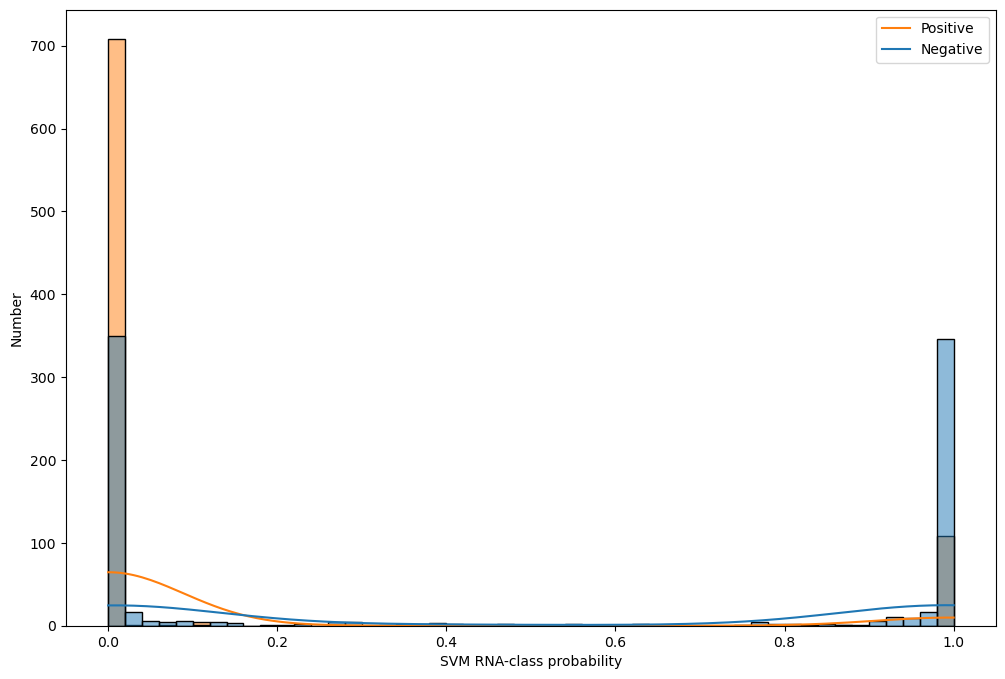

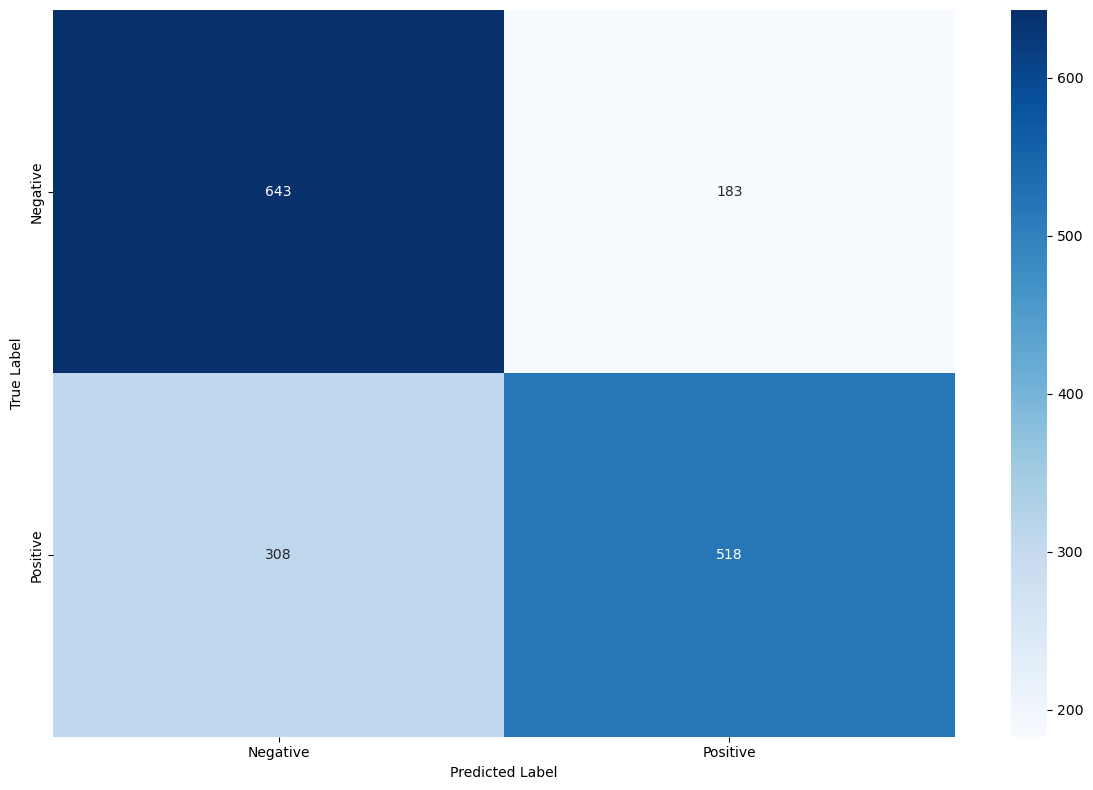


 Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.78      0.72       826
           1       0.74      0.63      0.68       826

    accuracy                           0.70      1652
   macro avg       0.71      0.70      0.70      1652
weighted avg       0.71      0.70      0.70      1652



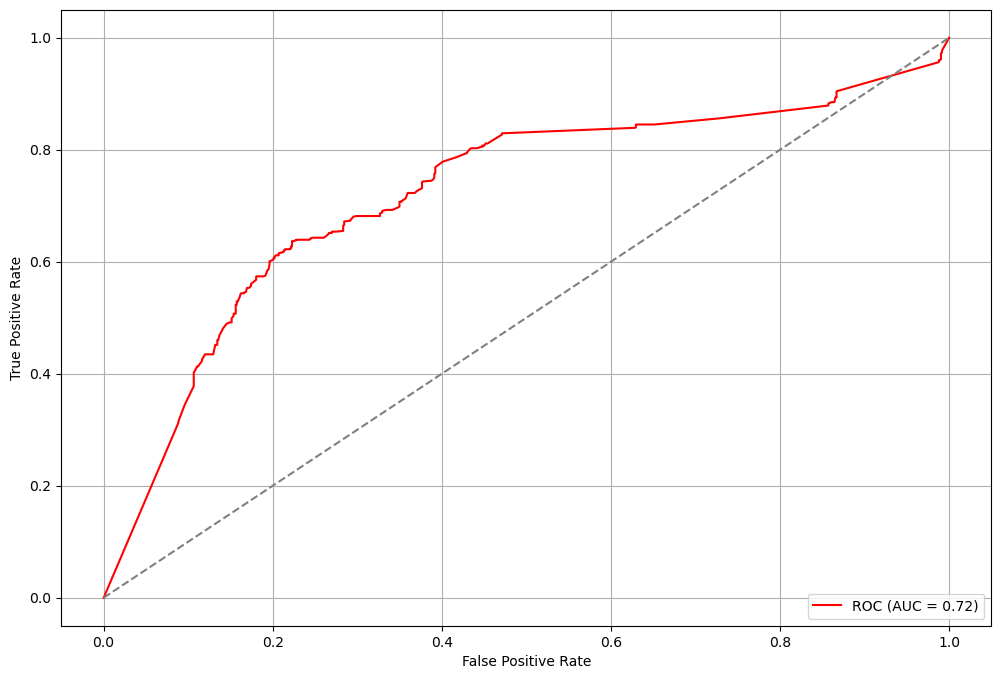

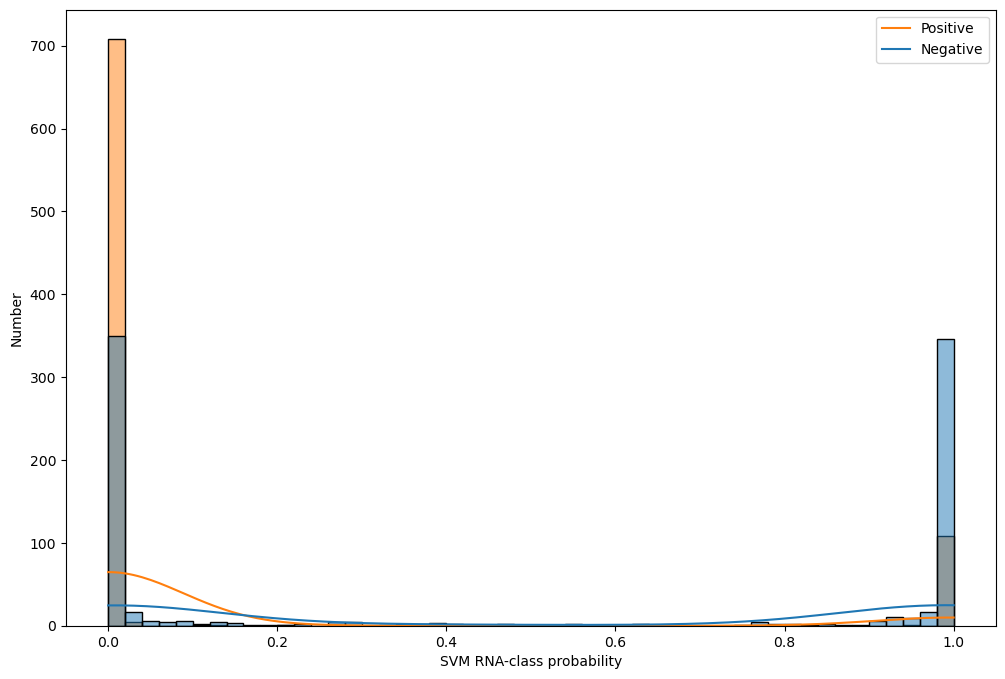

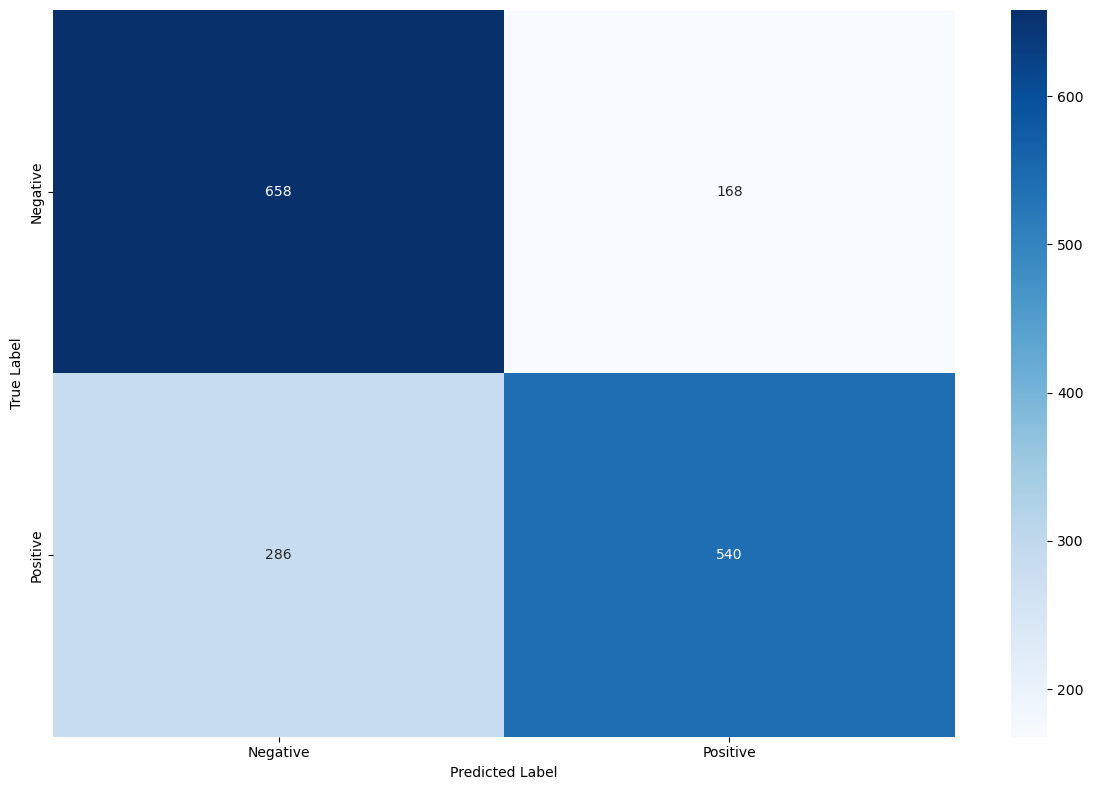


 Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.74       826
           1       0.76      0.65      0.70       826

    accuracy                           0.73      1652
   macro avg       0.73      0.73      0.72      1652
weighted avg       0.73      0.73      0.72      1652



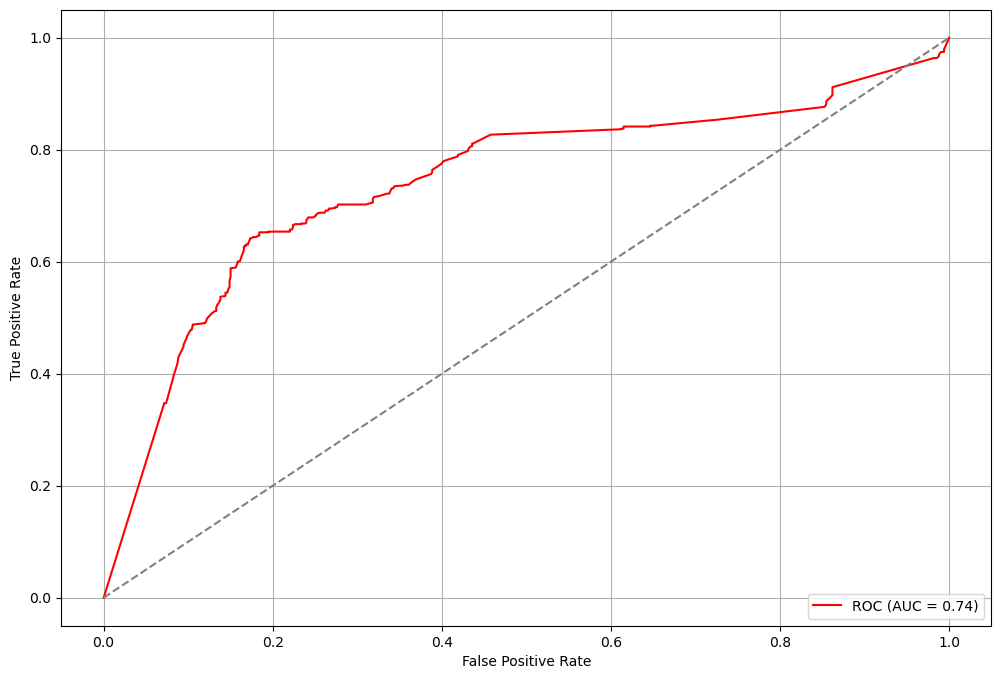

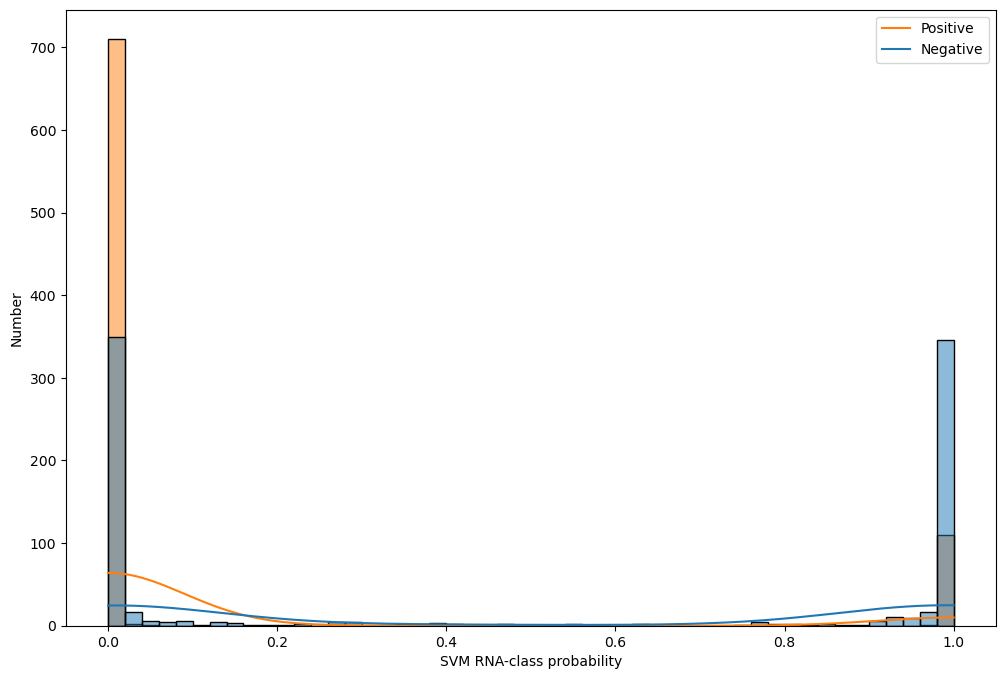

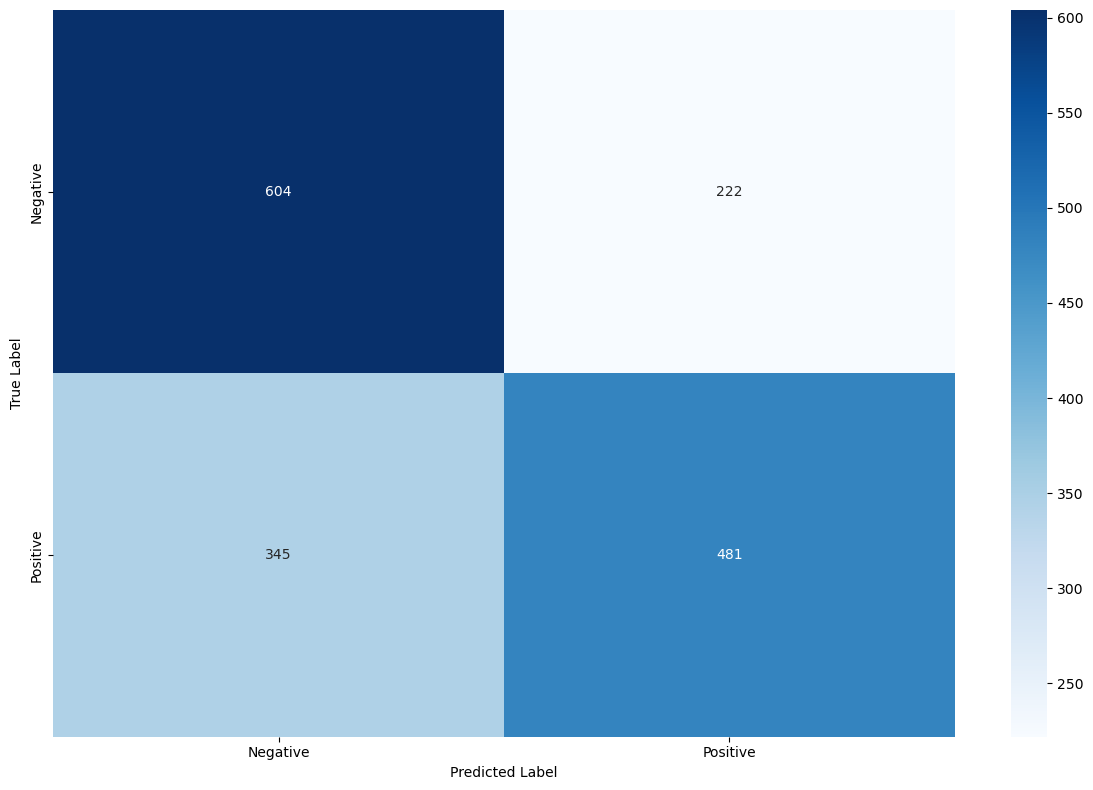


 Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.73      0.68       826
           1       0.68      0.58      0.63       826

    accuracy                           0.66      1652
   macro avg       0.66      0.66      0.65      1652
weighted avg       0.66      0.66      0.65      1652



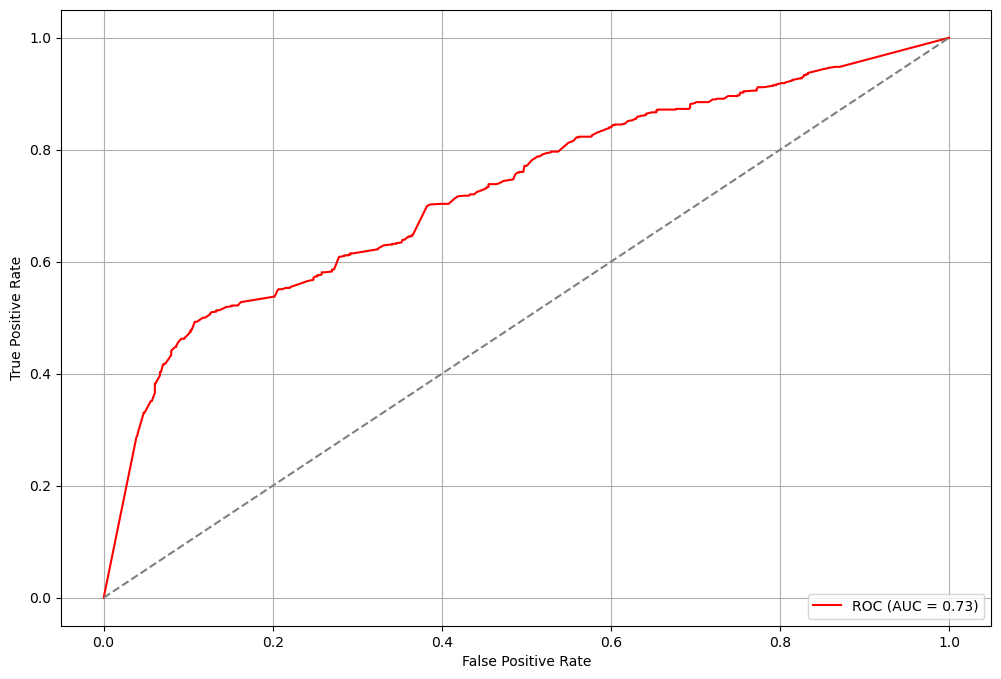

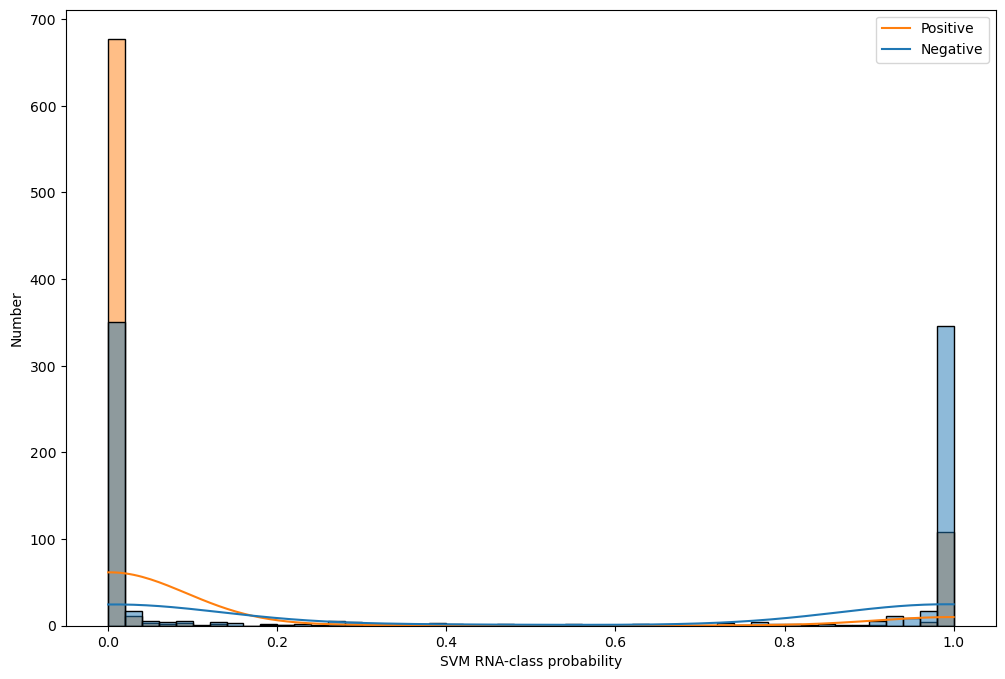

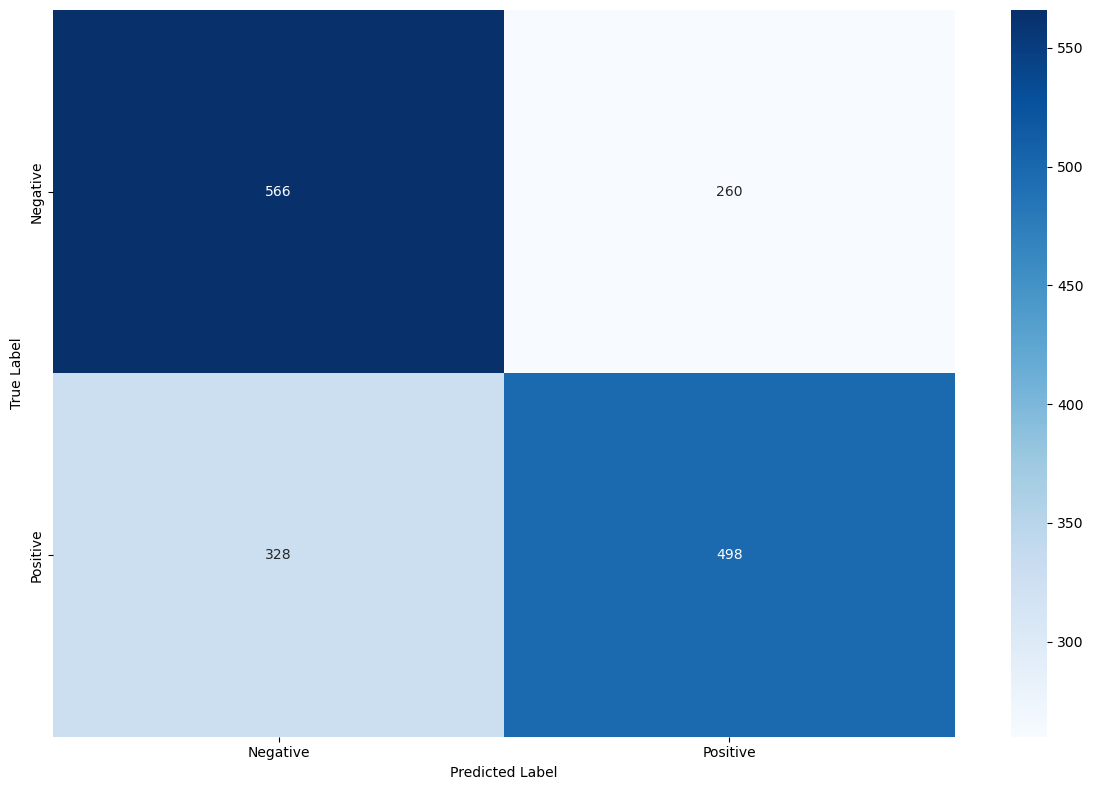


 Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.69      0.66       826
           1       0.66      0.60      0.63       826

    accuracy                           0.64      1652
   macro avg       0.65      0.64      0.64      1652
weighted avg       0.65      0.64      0.64      1652



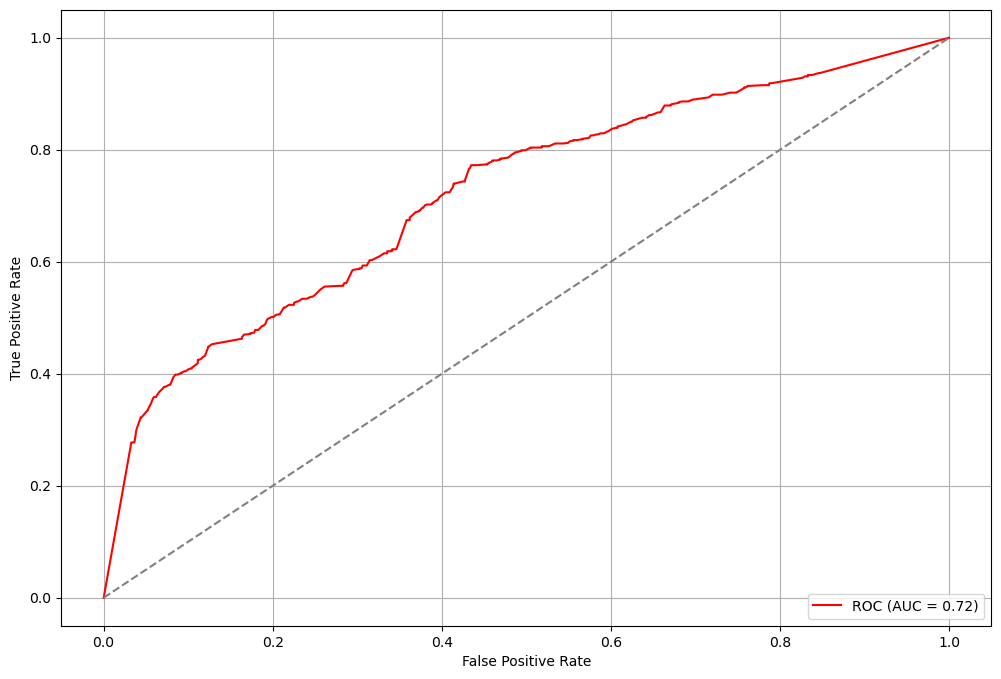

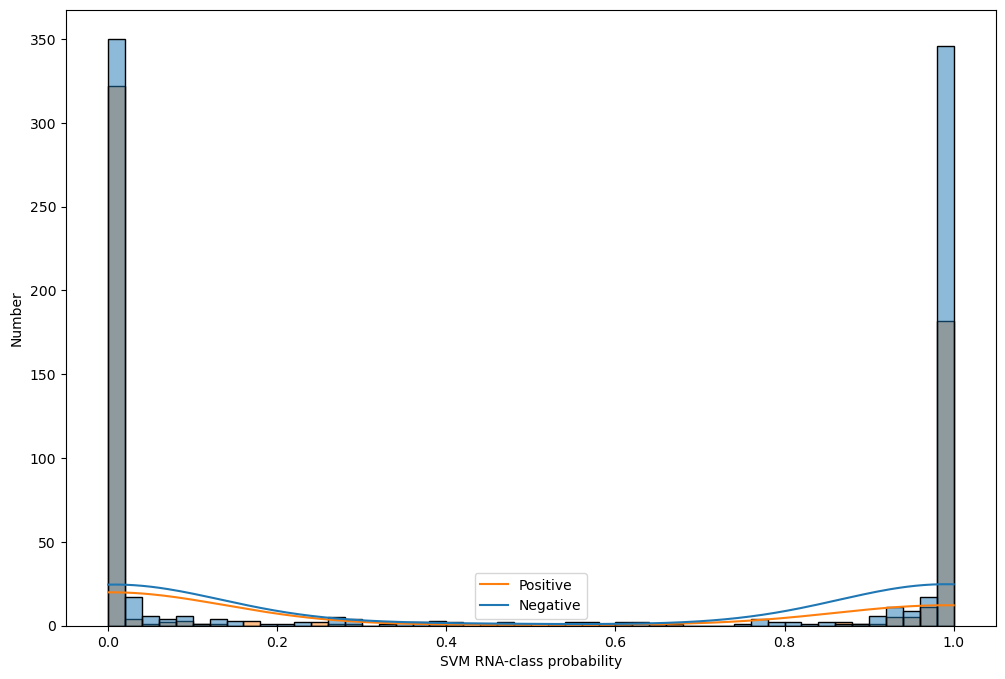

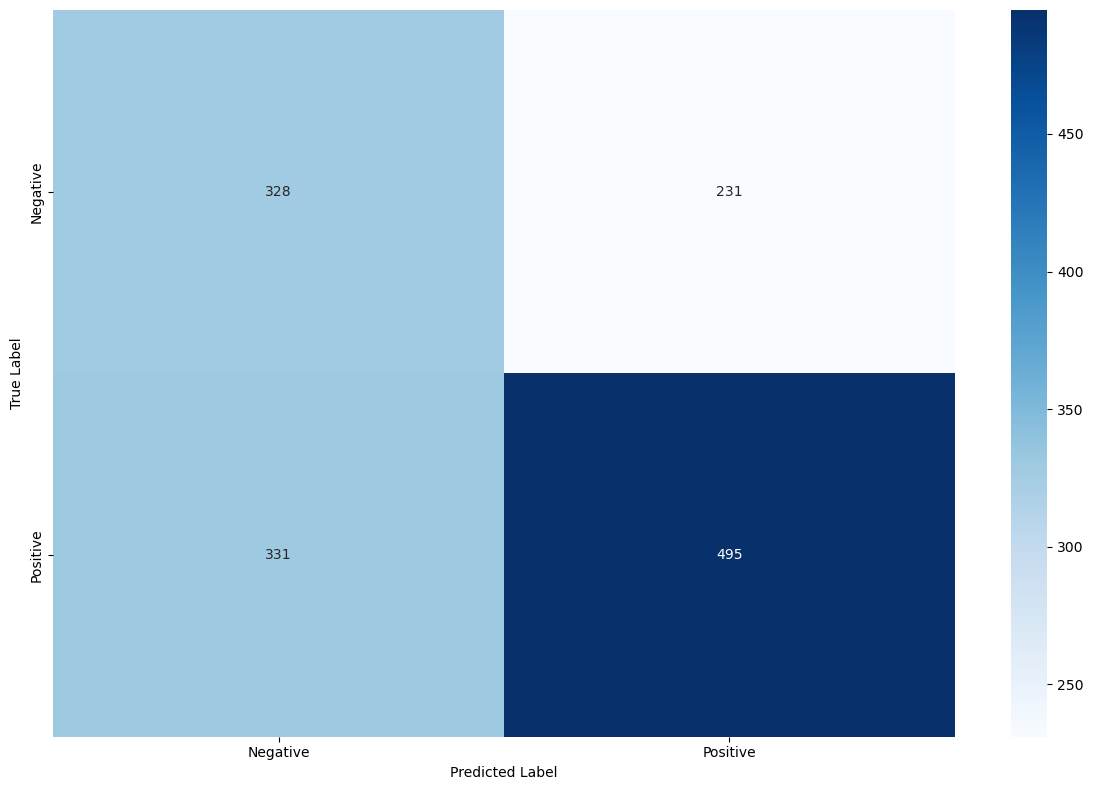


 Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.59      0.54       559
           1       0.68      0.60      0.64       826

    accuracy                           0.59      1385
   macro avg       0.59      0.59      0.59      1385
weighted avg       0.61      0.59      0.60      1385



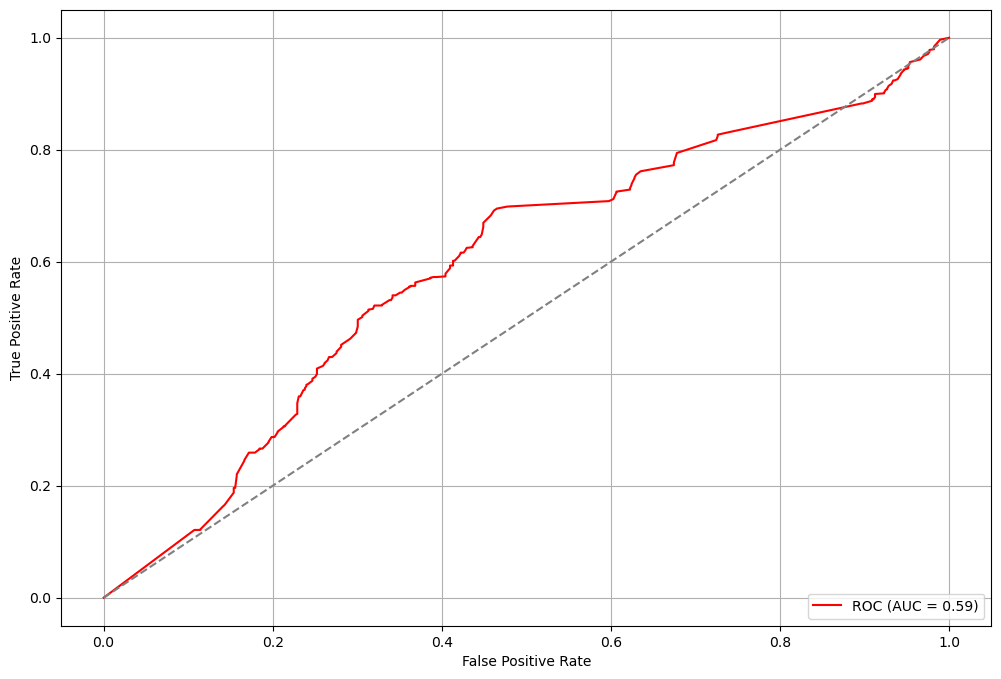

In [4]:
all_roc_data = []

tools = [
    {
        "df_positive": df_native,
        "df_negative": df_sissiz_mono,
        "title_suffix": "SISSI vs SISSIz_MONO with native samples",
        "save_path": "/mnt/bernhard/Masterarbeit/2.Versuch/Plots/Native/RNAz/"
    }, 
    {
        "df_positive": df_native,
        "df_negative": df_sissiz_di,
        "title_suffix": "SISSI vs SISSIz_DI with native samples",
        "save_path": "/mnt/bernhard/Masterarbeit/2.Versuch/Plots/Native/RNAz/"
    }, 
    {
        "df_positive": df_native,
        "df_negative": df_multiperm_mono,
        "title_suffix": "SISSI vs Multiperm_MONO with native samples",
        "save_path": "/mnt/bernhard/Masterarbeit/2.Versuch/Plots/Native/RNAz/"
    }, 
    {
        "df_positive": df_native,
        "df_negative": df_multiperm_di,
        "title_suffix": "SISSI vs Multiperm_DI with native samples",
        "save_path": "/mnt/bernhard/Masterarbeit/2.Versuch/Plots/Native/RNAz/"
    }, 
    {
        "df_positive": df_native,
        "df_negative": df_aln_shuffle,
        "title_suffix": "SISSI vs Aln_Shuffle with native samples",
        "save_path": "/mnt/bernhard/Masterarbeit/2.Versuch/Plots/Native/RNAz/"
    }
]

for tool in tools:
    roc_data = evaluate_classifier(
        df_positive=tool["df_positive"],
        df_negative=tool["df_negative"],
        title_suffix=tool["title_suffix"],
        save_path=tool["save_path"]
    )
    all_roc_data.extend(roc_data)

In [5]:
# all_roc_data = []

# tools = [
#     {
#         "df_positive": df_native,
#         "df_negative": df_sissiz_mono,
#         "title_suffix": "SISSI vs SISSIz_MONO",
#         "save_path": "D:/Masterarbeit/2.Versuch/Plots/Native/RNAz/"
#     }, 
#     {
#         "df_positive": df_native,
#         "df_negative": df_sissiz_di,
#         "title_suffix": "SISSI vs SISSIz_DI",
#         "save_path": "D:/Masterarbeit/2.Versuch/Plots/Native/RNAz/"
#     }, 
#     {
#         "df_positive": df_native,
#         "df_negative": df_multiperm_mono,
#         "title_suffix": "SISSI vs Multiperm_MONO",
#         "save_path": "D:/Masterarbeit/2.Versuch/Plots/Native/RNAz/"
#     }, 
#     {
#         "df_positive": df_native,
#         "df_negative": df_multiperm_di,
#         "title_suffix": "SISSI vs Multiperm_DI",
#         "save_path": "D:/Masterarbeit/2.Versuch/Plots/Native/RNAz/"
#     }, 
#     {
#         "df_positive": df_native,
#         "df_negative": df_aln_shuffle,
#         "title_suffix": "SISSI vs Aln_Shuffle",
#         "save_path": "D:/Masterarbeit/2.Versuch/Plots/Native/RNAz/"
#     }
# ]

# for tool in tools:
#     roc_data = evaluate_classifier(
#         df_positive=tool["df_positive"],
#         df_negative=tool["df_negative"],
#         title_suffix=tool["title_suffix"],
#         save_path=tool["save_path"]
#     )
#     all_roc_data.extend(roc_data)

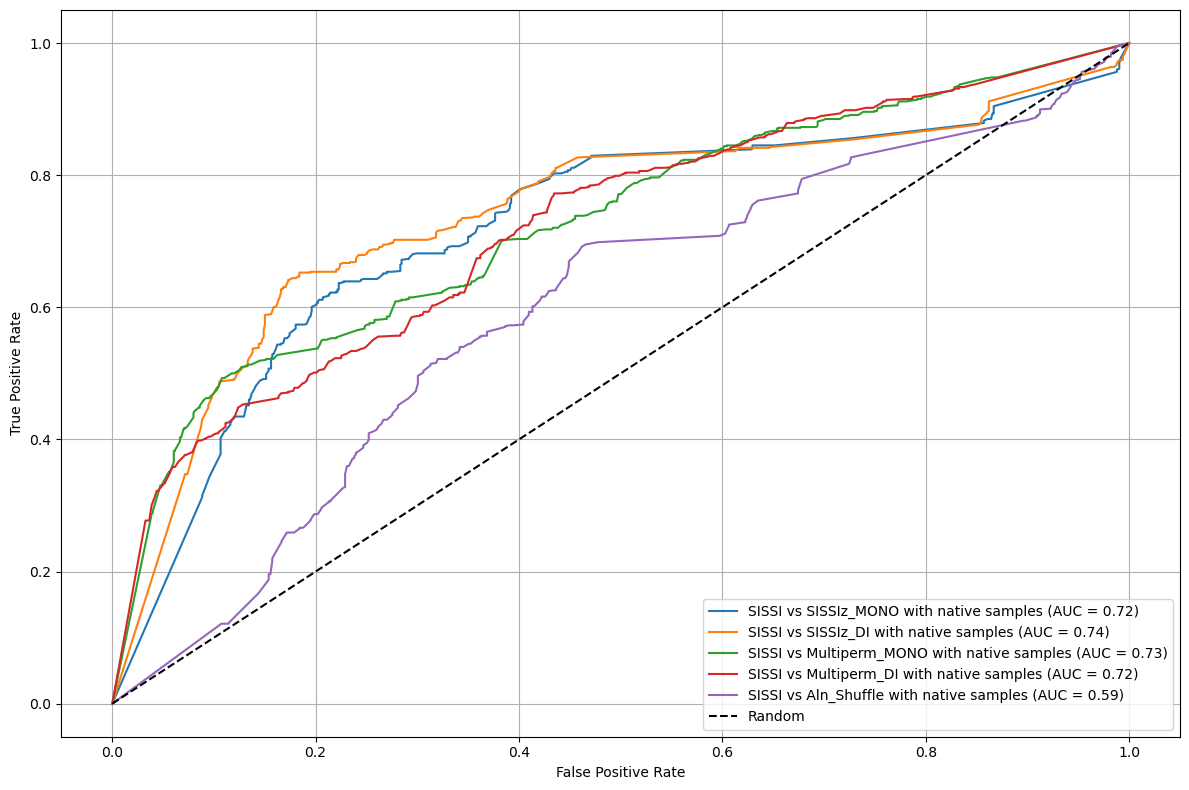

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import os

save_path = "/mnt/bernhard/Masterarbeit/2.Versuch/Plots/Native/RNAz/"

plt.figure(figsize=(12, 8))

for entry in all_roc_data:
    fpr, tpr, _ = roc_curve(entry['y_true'], entry['y_proba'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{entry['label']} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# plt.title("RNAz: ROC-Curves comparison with native samples")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
if save_path:
    filename = os.path.join(save_path, "RNAz: ROC Curve All with native samples.png")
    plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()